## **Spotting problems using graphics and visualization**

In [6]:
load_rds_from_url <- function(file_url) {
  library(curl)
  temp_file <- tempfile(fileext = ".RDS")
  curl_download(file_url, destfile = temp_file)
  data <- readRDS(temp_file)
  return(data)
}


## ***1. Load the data***


In [7]:

file_url <- "https://raw.githubusercontent.com/WinVector/PDSwR2/main/Custdata/custdata.RDS"
custdata <- load_rds_from_url(file_url)
custdata


,custid,sex,is_employed,income,marital_status,health_ins,housing_type,recent_move,num_vehicles,age,state_of_res,gas_usage
,<chr>,<fct>,<lgl>,<dbl>,<fct>,<lgl>,<fct>,<lgl>,<dbl>,<dbl>,<fct>,<dbl>
7,000006646_03,Male,TRUE,22000,Never married,TRUE,Homeowner free and clear,FALSE,0,24,Alabama,210
8,000007827_01,Female,NA,23200,Divorced/Separated,TRUE,Rented,TRUE,0,82,Alabama,3
9,000008359_04,Female,TRUE,21000,Never married,TRUE,Homeowner with mortgage/loan,FALSE,2,31,Alabama,40
10,000008529_01,Female,NA,37770,Widowed,TRUE,Homeowner free and clear,FALSE,1,93,Alabama,120
11,000008744_02,Male,TRUE,39000,Divorced/Separated,TRUE,Rented,FALSE,2,67,Alabama,3
15,000011466_01,Male,NA,11100,Married,TRUE,Homeowner free and clear,FALSE,2,76,Alabama,200
17,000015018_01,Female,TRUE,25800,Married,FALSE,Rented,FALSE,2,26,Alabama,3
19,000017314_02,Female,NA,34600,Married,TRUE,Homeowner free and clear,FALSE,2,73,Alabama,50
20,000017383_04,Female,TRUE,25000,Never married,TRUE,Homeowner free and clear,FALSE,5,27,Alabama,3


In [11]:
summary(custdata)

    custid              sex        is_employed         income       
 Length:73262       Female:37837   Mode :logical   Min.   :  -6900  
 Class :character   Male  :35425   FALSE:2351      1st Qu.:  10700  
 Mode  :character                  TRUE :45137     Median :  26200  
                                   NA's :25774     Mean   :  41764  
                                                   3rd Qu.:  51700  
                                                   Max.   :1257000  
                                                                    
            marital_status  health_ins     
 Divorced/Separated:10693   Mode :logical  
 Married           :38400   FALSE:7307     
 Never married     :19407   TRUE :65955    
 Widowed           : 4762                  
                                           
                                           
                                           
                       housing_type   recent_move      num_vehicles  
 Homeowner free and clear 

In [12]:
summary(custdata$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -6900   10700   26200   41764   51700 1257000 

In [13]:
summary(custdata$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   34.00   48.00   49.16   62.00  120.00 

## ***2. Plotting a histogram***

In [24]:
library(ggplot2)

Warning message:
“Removed 1720 rows containing non-finite outside the scale range (`stat_bin()`).”


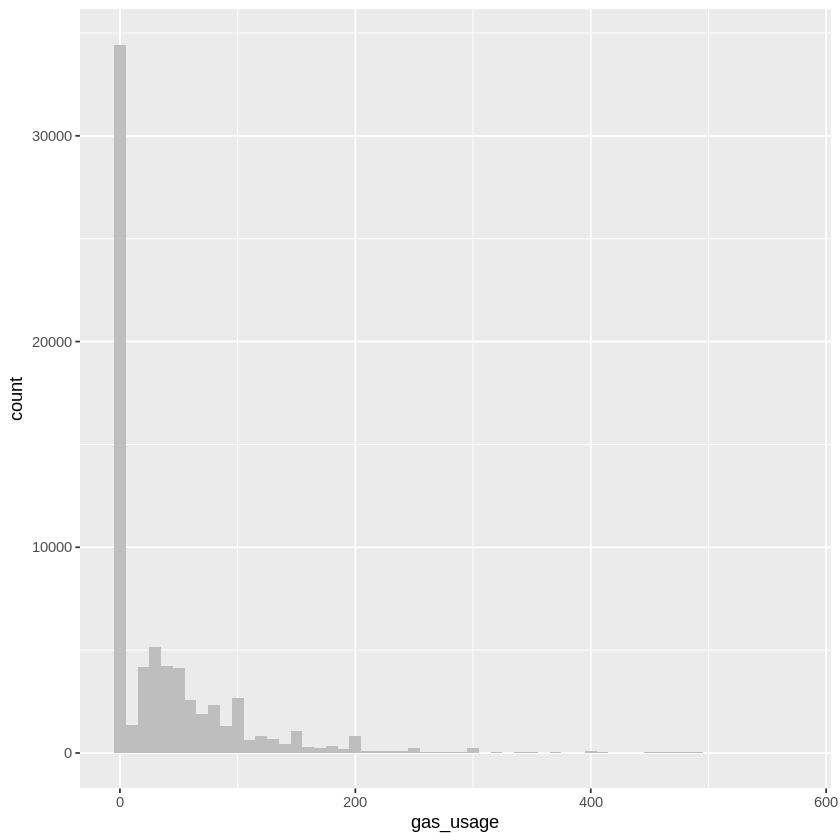

In [60]:
ggplot(custdata, aes(x=gas_usage)) +
geom_histogram(binwidth=10, fill="gray")

## ***3. Producing a density plot***

In [26]:
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




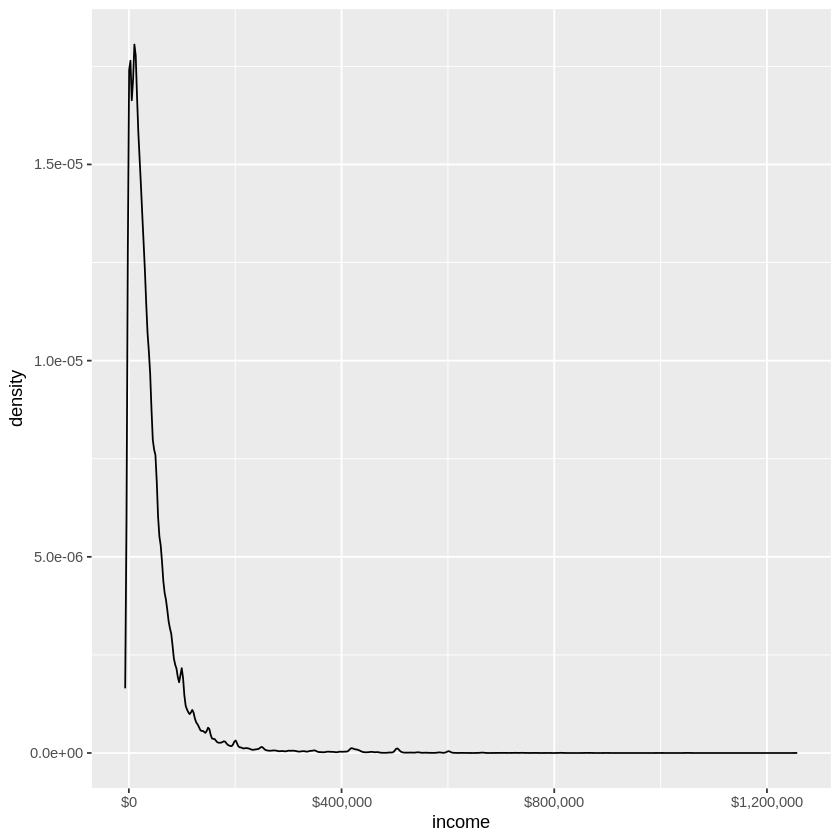

In [70]:
ggplot(custdata, aes(x=income)) +
geom_density() +
scale_x_continuous(labels=dollar)

## ***4. Creating a log-scaled density plot***

Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_x_log10(breaks = c(10, 100, 1000, 10000, 1e+05, 1e+06), :
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 6856 rows containing non-finite outside the scale range
(`stat_density()`).”


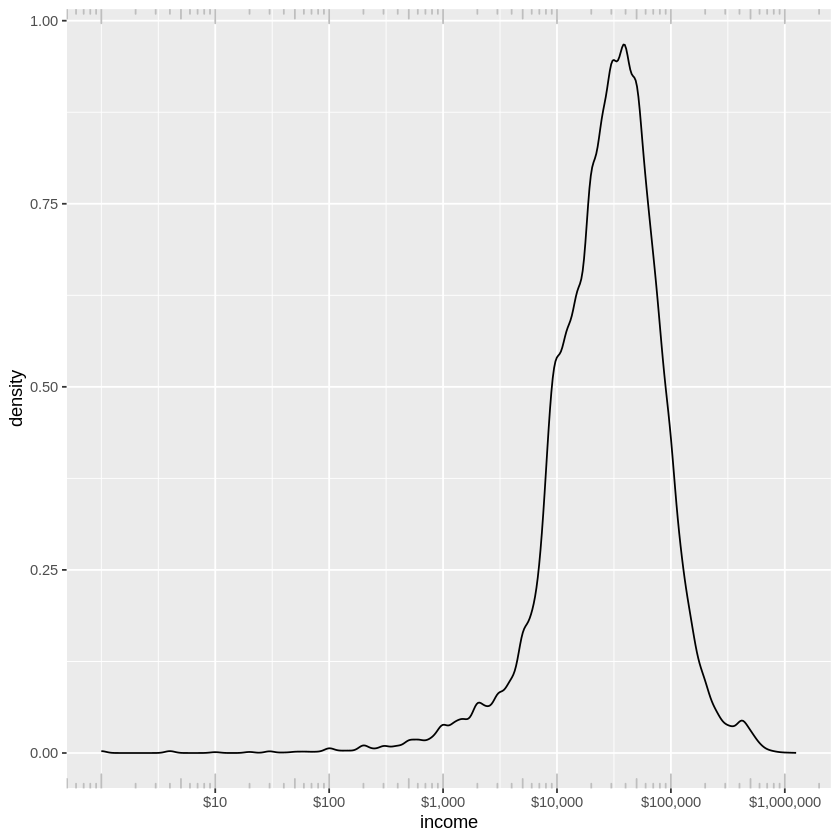

In [74]:
ggplot(custdata, aes(x=income)) + geom_density() +
scale_x_log10(breaks = c(10, 100, 1000, 10000, 100000, 1000000),
labels=dollar) + annotation_logticks(sides="bt", color="gray")

## ***5. Producing a horizontal bar chart***

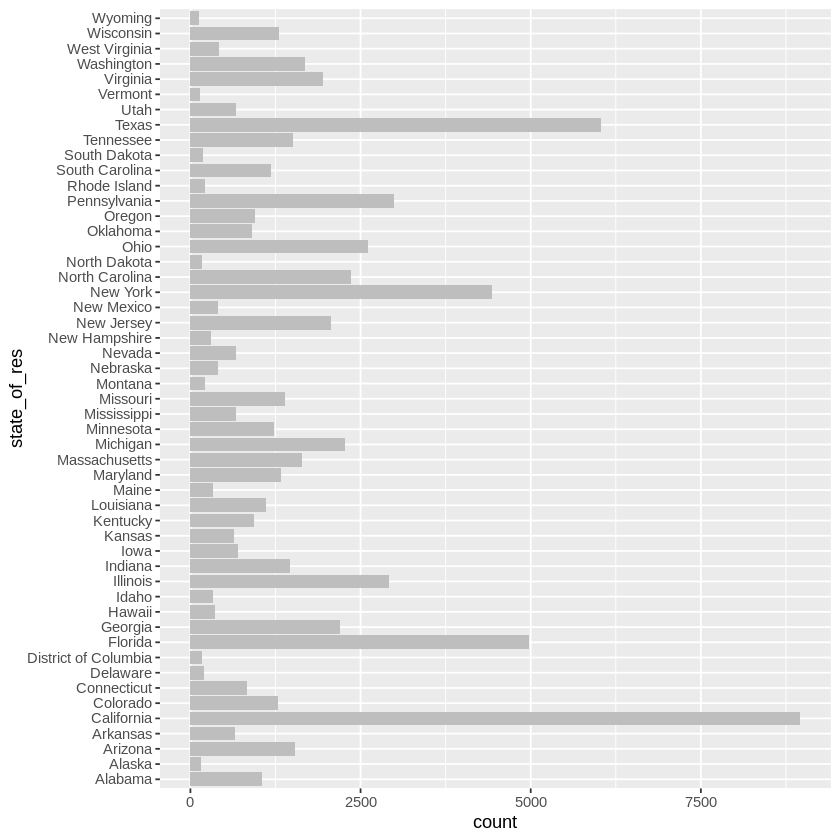

In [75]:
ggplot(custdata, aes(x=state_of_res)) +
geom_bar(fill="gray") + coord_flip()

## **6. Producing a dot plot with sorted categories**




In [76]:
# install.packages("WVPlots")
library(WVPlots)

<ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>
    aspect: function
    backtransform_range: function
    clip: on
    default: FALSE
    distance: function
    expand: TRUE
    is_free: function
    is_linear: function
    labels: function
    limits: list
    modify_scales: function
    range: function
    render_axis_h: function
    render_axis_v: function
    render_bg: function
    render_fg: function
    setup_data: function
    setup_layout: function
    setup_panel_guides: function
    setup_panel_params: function
    setup_params: function
    train_panel_guides: function
    transform: function
    super:  <ggproto object: Class CoordFlip, CoordCartesian, Coord, gg>

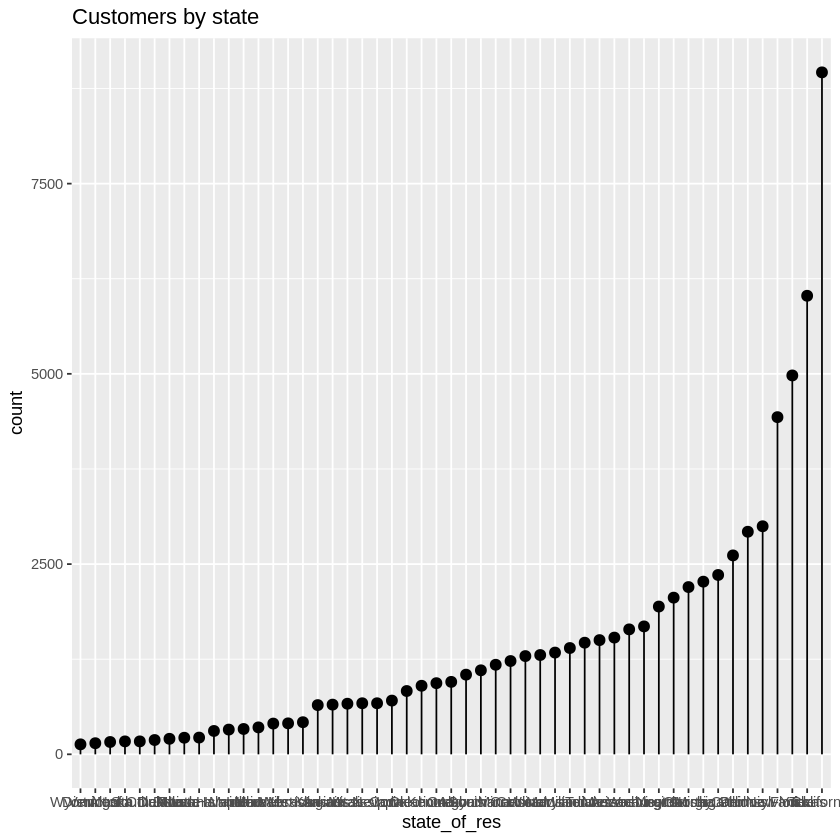

In [77]:
ClevelandDotPlot(custdata, "state_of_res", sort = 1, title="Customers by state")
coord_flip()



## **7. Producing a line plot**



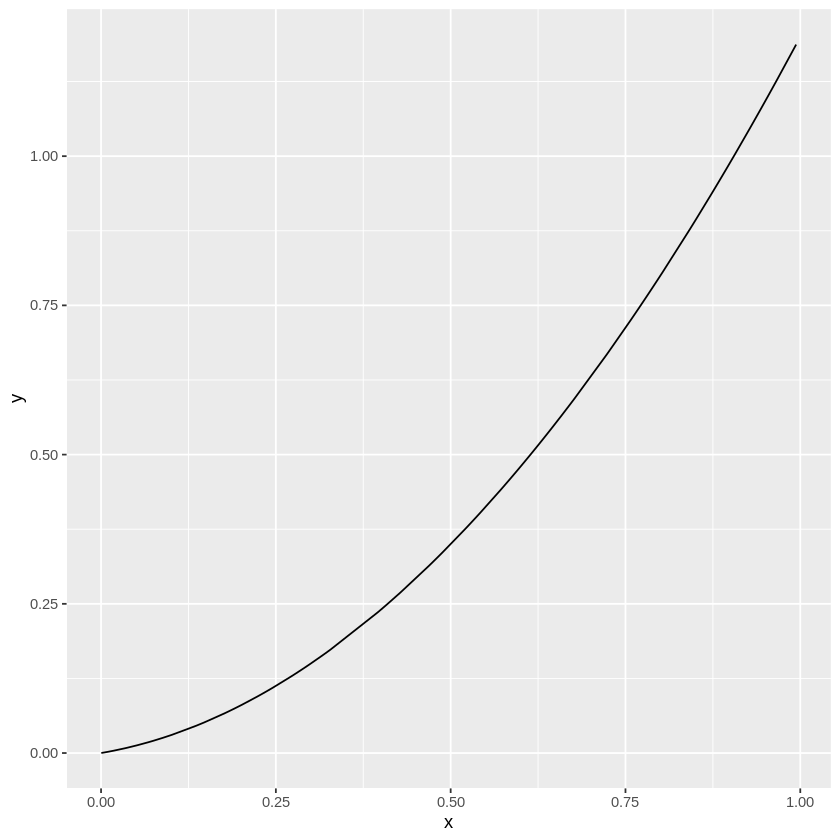

In [78]:
x <- runif(100)
y <- x^2 + 0.2*x
ggplot(data.frame(x=x,y=y), aes(x=x,y=y)) + geom_line()



## **8. Examining the correlation between age and income**


In [40]:
custdata2 <- subset(custdata, 0 < age & age < 100 & 0 < income & income < 200000)
custdata2

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,recent_move,num_vehicles,age,state_of_res,gas_usage
,<chr>,<fct>,<lgl>,<dbl>,<fct>,<lgl>,<fct>,<lgl>,<dbl>,<dbl>,<fct>,<dbl>
7,000006646_03,Male,TRUE,22000,Never married,TRUE,Homeowner free and clear,FALSE,0,24,Alabama,210
8,000007827_01,Female,NA,23200,Divorced/Separated,TRUE,Rented,TRUE,0,82,Alabama,3
9,000008359_04,Female,TRUE,21000,Never married,TRUE,Homeowner with mortgage/loan,FALSE,2,31,Alabama,40
10,000008529_01,Female,NA,37770,Widowed,TRUE,Homeowner free and clear,FALSE,1,93,Alabama,120
11,000008744_02,Male,TRUE,39000,Divorced/Separated,TRUE,Rented,FALSE,2,67,Alabama,3
15,000011466_01,Male,NA,11100,Married,TRUE,Homeowner free and clear,FALSE,2,76,Alabama,200
17,000015018_01,Female,TRUE,25800,Married,FALSE,Rented,FALSE,2,26,Alabama,3
19,000017314_02,Female,NA,34600,Married,TRUE,Homeowner free and clear,FALSE,2,73,Alabama,50
20,000017383_04,Female,TRUE,25000,Never married,TRUE,Homeowner free and clear,FALSE,5,27,Alabama,3




## **9. Creating a scatterplot of age and income**



`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


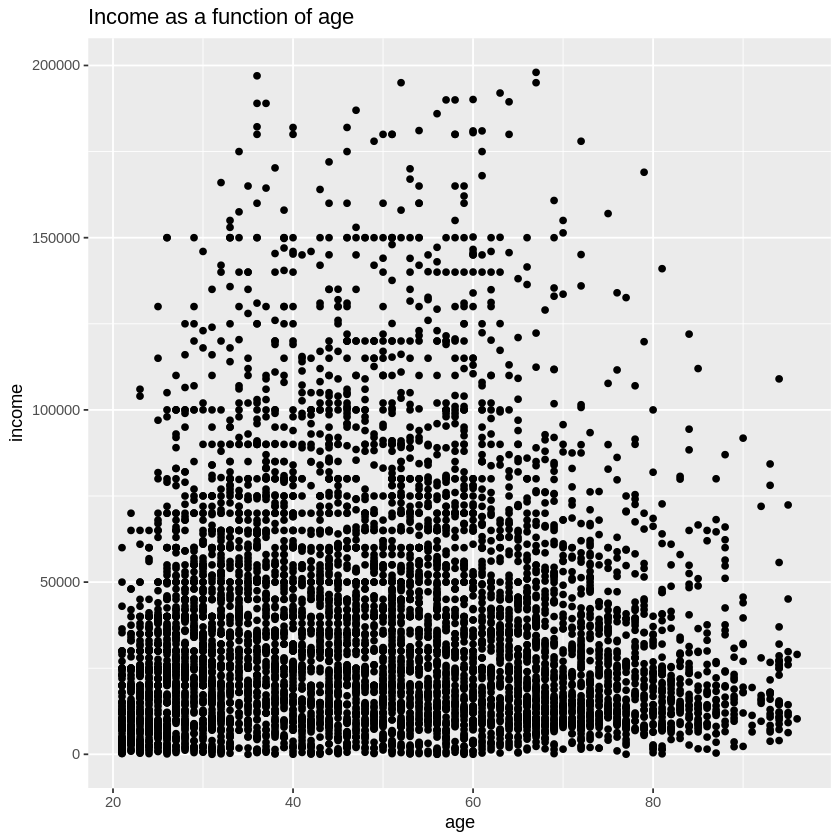

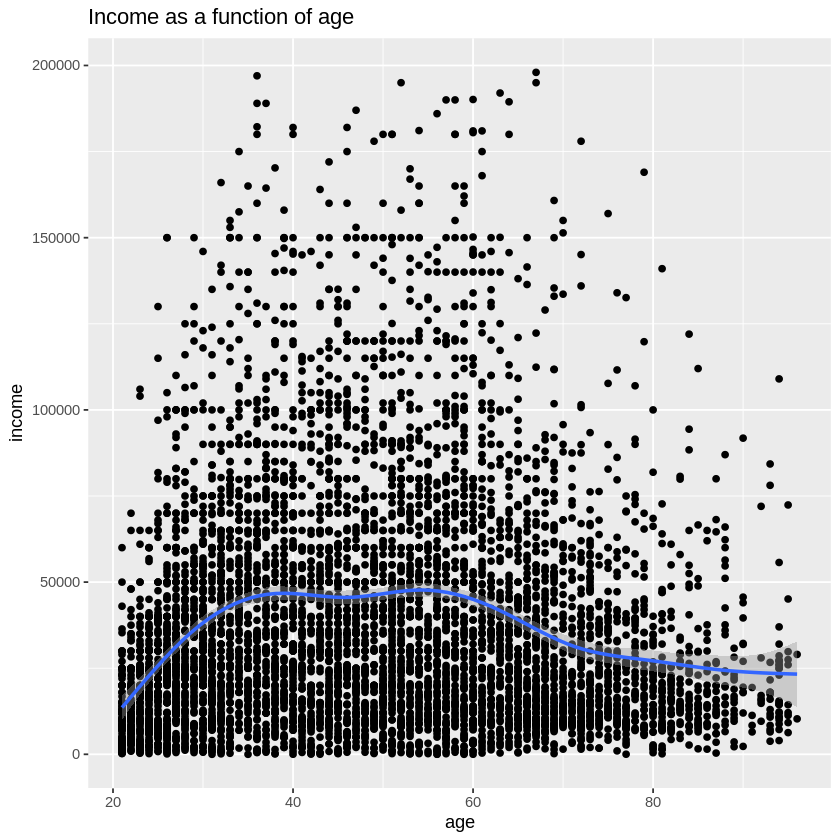

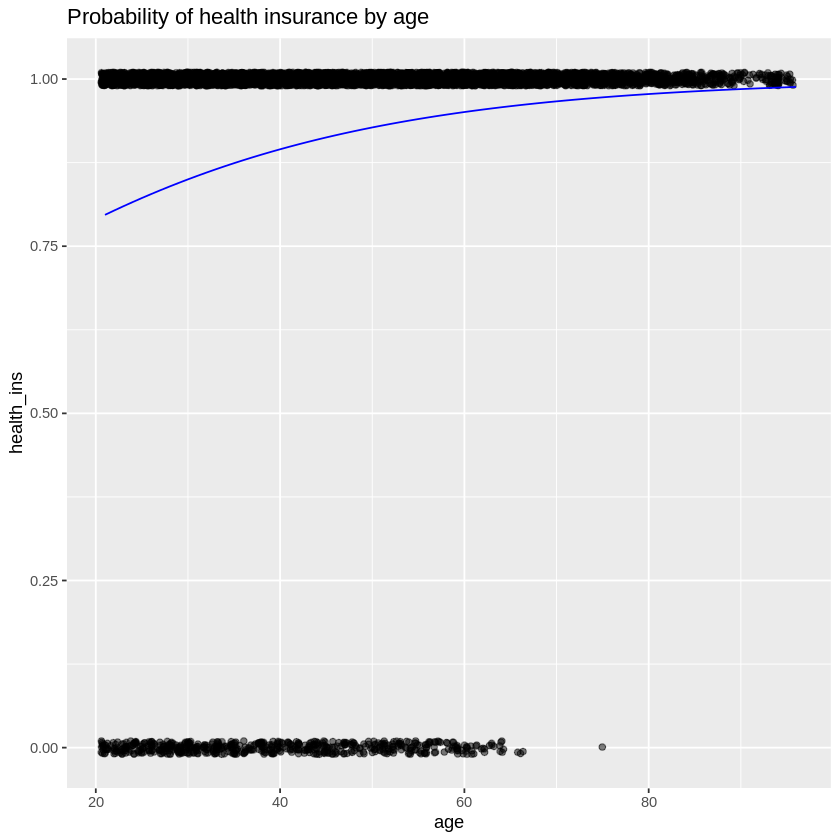

In [42]:
set.seed(245566)
customer_data_samp <- dplyr::sample_frac(custdata2, size=0.1, replace=FALSE)
ggplot(customer_data_samp, aes(x=age, y=income)) + geom_point() +
ggtitle("Income as a function of age")
ggplot(customer_data_samp, aes(x=age, y=income)) + geom_point() +
geom_smooth() + ggtitle("Income as a function of age")
BinaryYScatterPlot(customer_data_samp, "age", "health_ins", title = "Probability of health insurance by age")



## **10. Producing a hexbin plot**





In [47]:
library(WVPlots)
# install.packages("hexbin")
library(hexbin)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


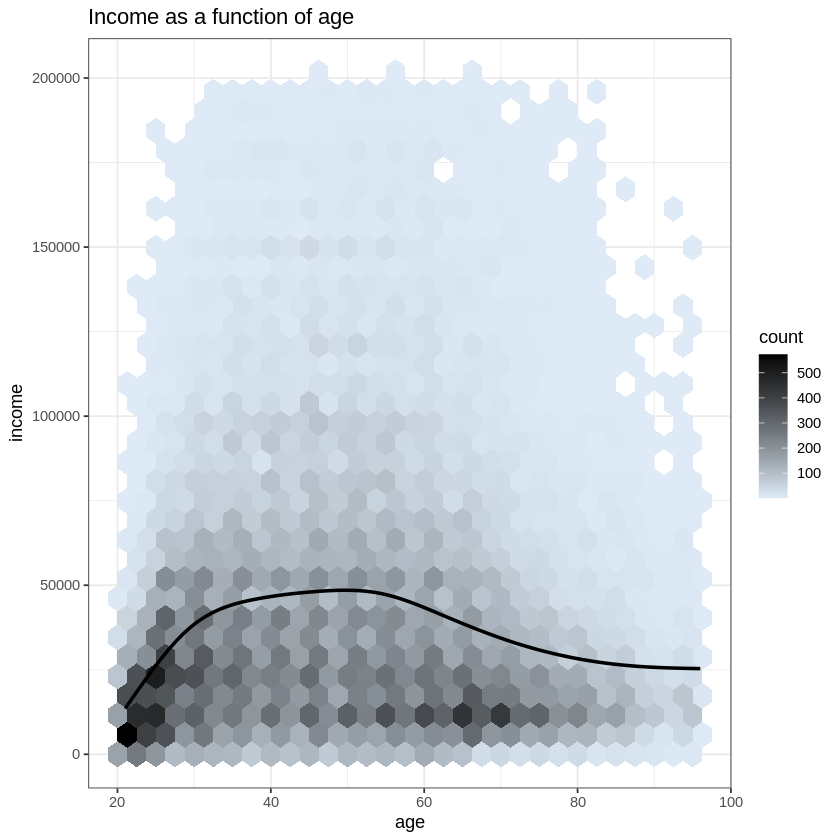

In [48]:

HexBinPlot(custdata2, "age", "income", "Income as a function of age") +
geom_smooth(color="black", se=FALSE)


## **11. Specifying different styles of bar chart**


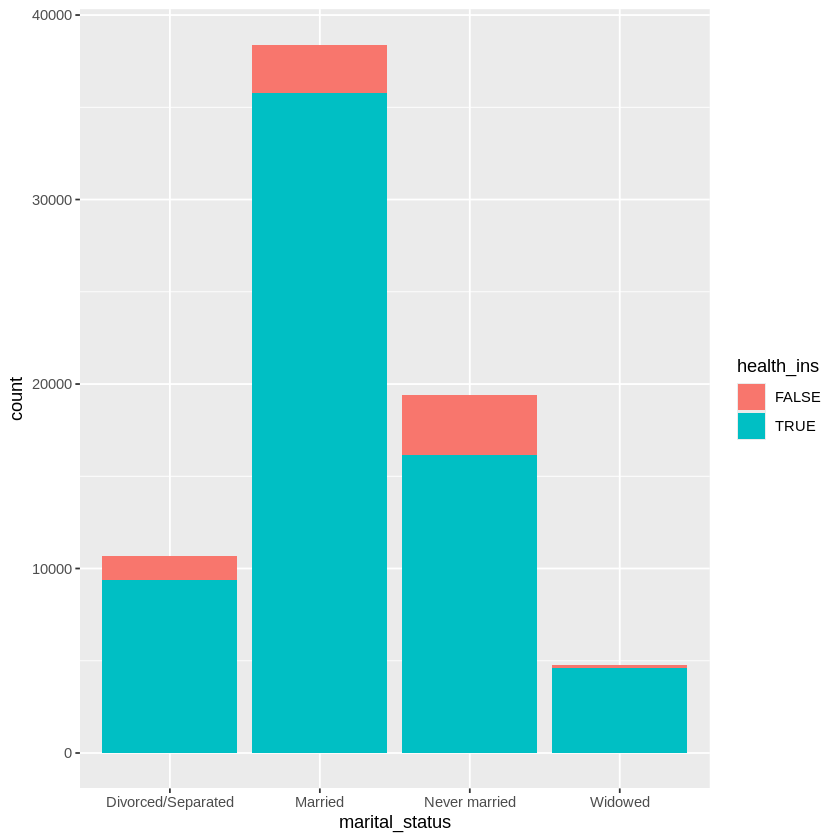

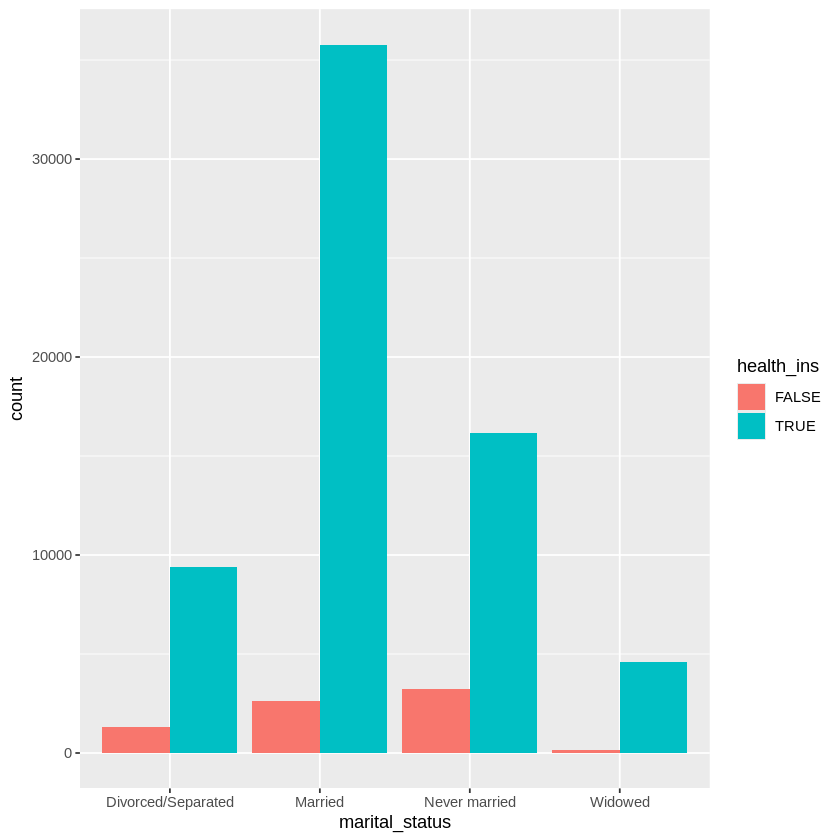

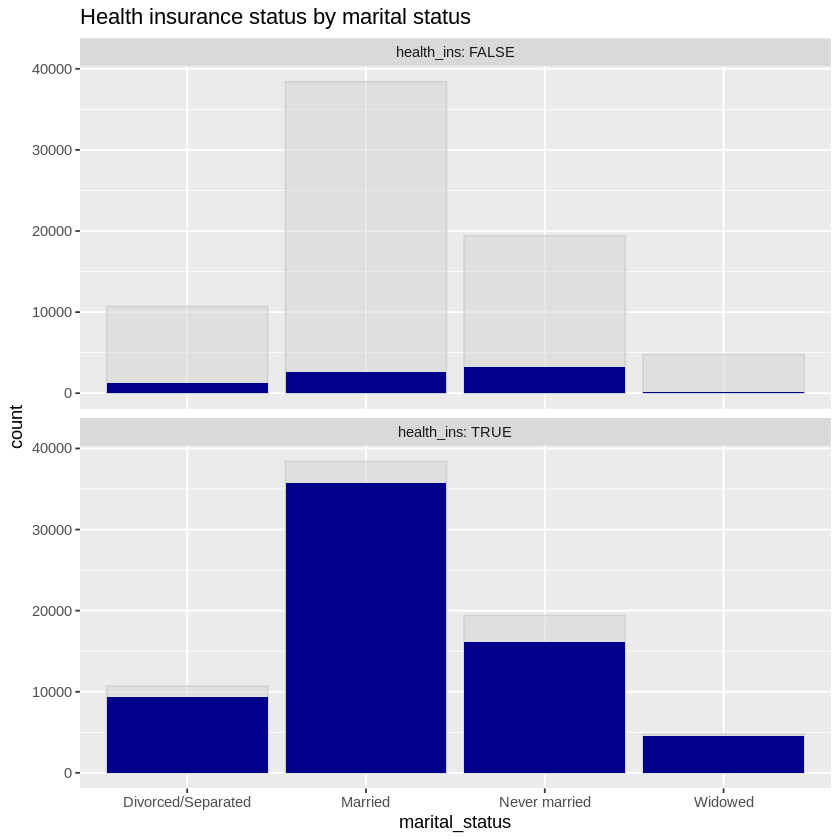

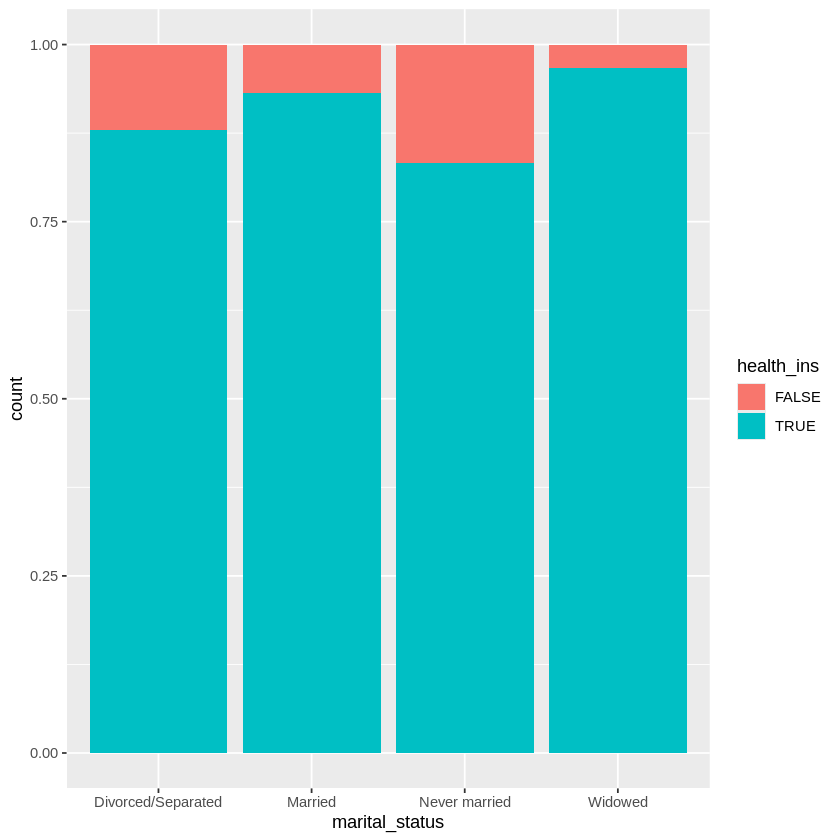

In [50]:
ggplot(custdata, aes(x=marital_status, fill=health_ins)) + geom_bar()

ggplot(custdata, aes(x=marital_status, fill=health_ins)) + geom_bar(position = "dodge")

ShadowPlot(custdata, "marital_status", "health_ins", title = "Health insurance status by marital status")

ggplot(custdata, aes(x=marital_status, fill=health_ins)) + geom_bar(position = "fill")



## **12. Plotting a bar chart with and without facets**


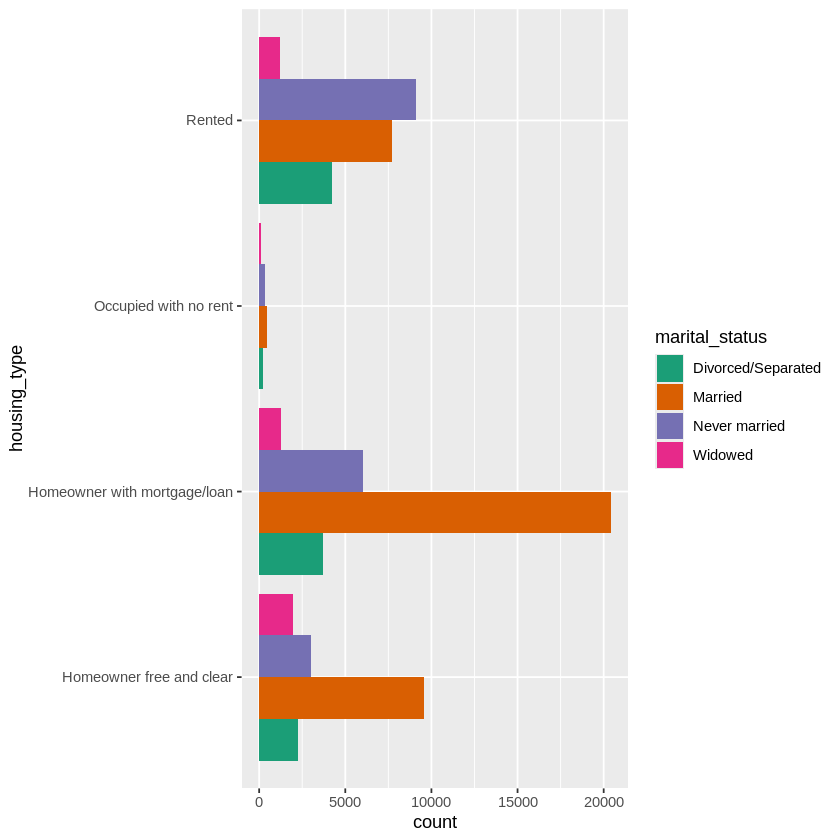

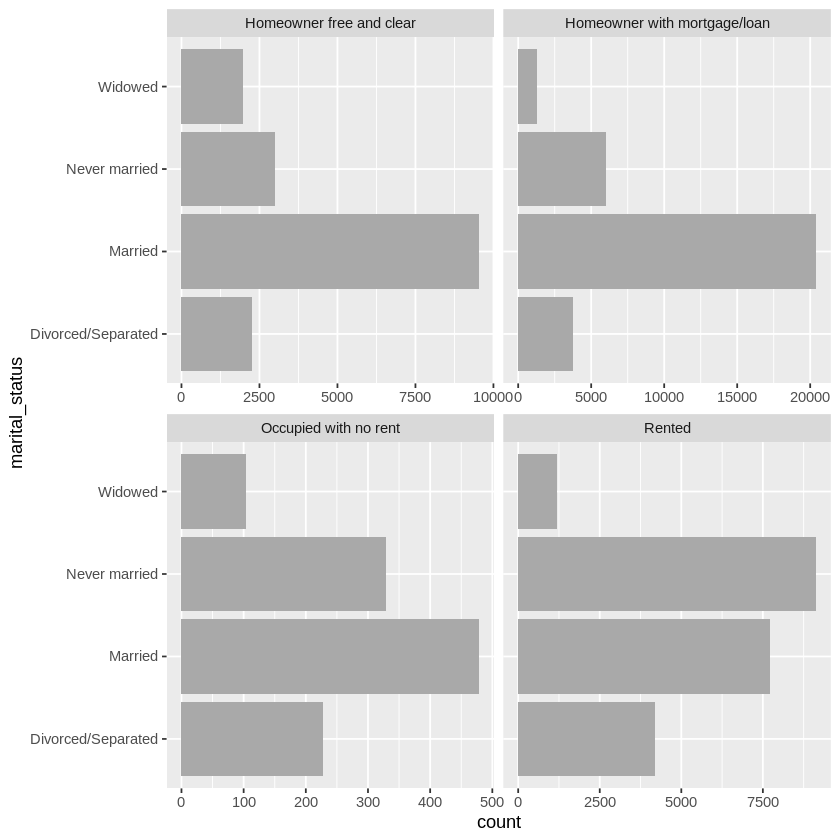

In [52]:
cdata <- subset(custdata, !is.na(housing_type))

ggplot(cdata, aes(x=housing_type, fill=marital_status)) +
geom_bar(position = "dodge") +
scale_fill_brewer(palette = "Dark2") +
coord_flip()

ggplot(cdata, aes(x=marital_status)) +
geom_bar(fill="darkgray") +
facet_wrap(~housing_type, scale="free_x") +
coord_flip()



## **13. Comparing population densities across categories**



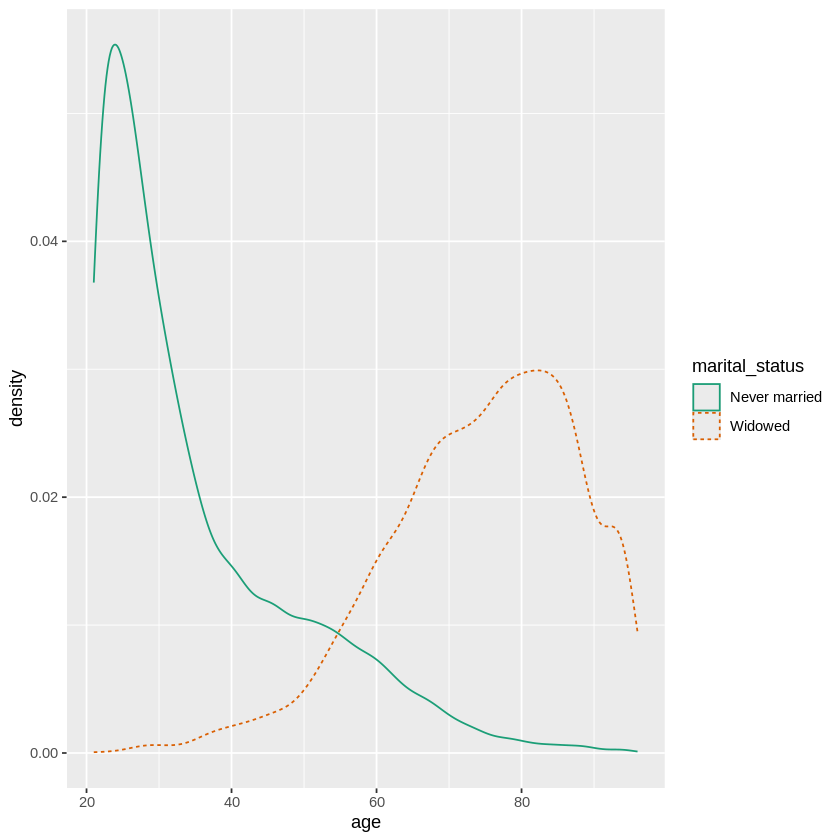

In [54]:
custdata3 = subset(custdata2, marital_status %in% c("Never married", "Widowed"))

ggplot(custdata3, aes(x=age, color=marital_status, linetype=marital_status)) +
geom_density() +
scale_color_brewer(palette="Dark2")



## **14. Comparing population densities across categories with ShadowHist()**


Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the WVPlots package.
  Please report the issue at <https://github.com/WinVector/WVPlots/issues>.”


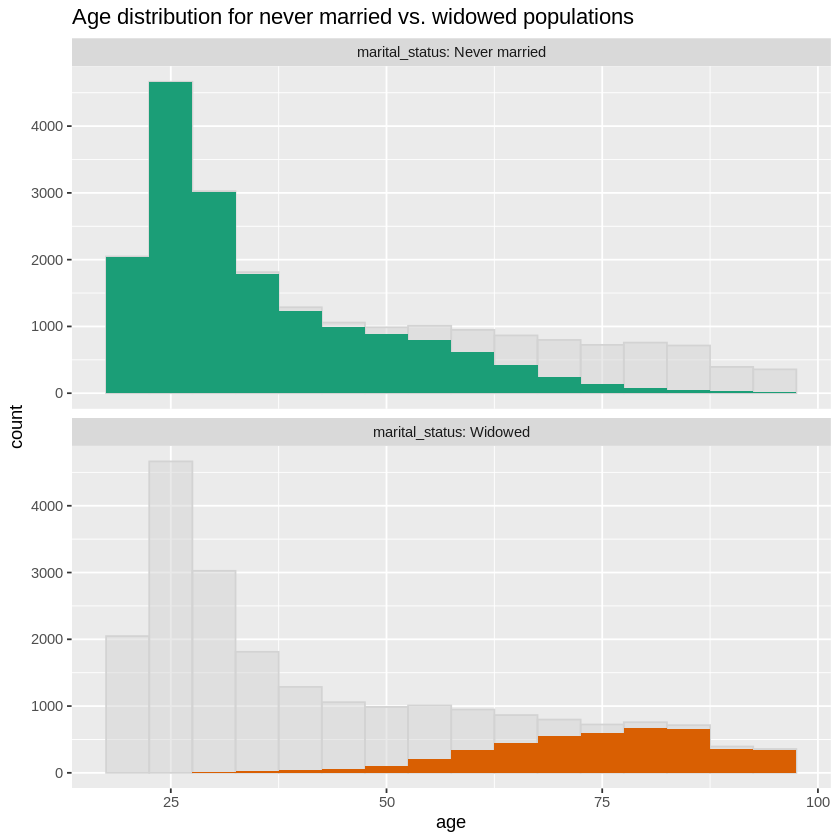

In [56]:
ShadowHist(custdata3, "age", "marital_status", "Age distribution for never married vs. widowed populations", binwidth=5)